# Trees and Forests

**NOTE:** This module code was partly taken from Andreas Muellers [Adavanced scikit-learn O'Reilly Course](http://shop.oreilly.com/product/0636920043836.do)

It is just used to explore the scikit-learn random forest object in a systematic manner

I've added more code to it to understand how to generate tree plots for random forests

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Decision Tree Classification
==================


In [8]:
%%bash
pwd
ls

/Users/shamindras/PERSONAL/LEARNING/STUDY/UC_BERKELEY/RESEARCH/SPRING_2017/scikit-learn-sandbox/jupyter
Trees and Forests.ipynb
figures


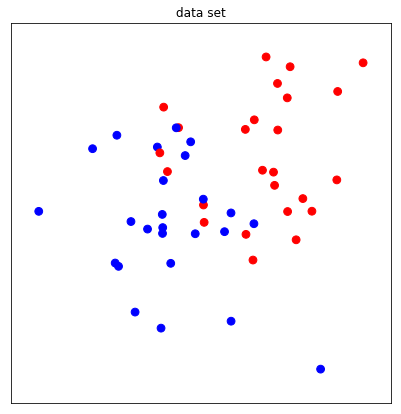

In [12]:
from figures import plot_interactive_tree
plot_interactive_tree.plot_tree_interactive()

## Random Forests

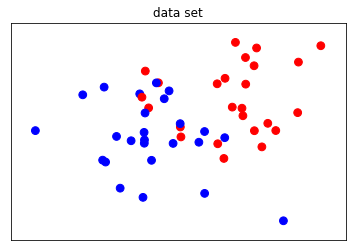

In [15]:
from figures import plot_interactive_forest
plot_interactive_forest.plot_forest_interactive()

## Selecting the Optimal Estimator via Cross-Validation

In [36]:
from sklearn import grid_search
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7, 9]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [17]:
clf_grid.score(X_train, y_train)

1.0

In [18]:
clf_grid.score(X_test, y_test)

0.97111111111111115

In [19]:
clf_grid.best_params_

{'max_depth': 9, 'max_features': 'sqrt'}

In [20]:
clf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Fit the forest manually

In [80]:
rf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [81]:
rf.score(X_test, y_test)

0.91555555555555557

In [82]:
print([estimator.tree_.max_depth for estimator in rf.estimators_])

[13, 16, 17, 12, 14]


In [86]:
for idx, dec_tree in enumerate(rf.estimators_):
    if idx == 0:
        print(dec_tree.tree_.max_depth)
    else:
        pass

13


In [87]:
for idx, dec_tree in enumerate(rf.estimators_):
    if idx == 0:
        tree.export_graphviz(dec_tree) 

/Users/shamindras/anaconda/envs/sklearnprod0/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


In [88]:
from sklearn import tree
i_tree = 0
for tree_in_forest in rf.estimators_:
    if i_tree ==0:
        with open('tree_' + str(i_tree) + '.png', 'w') as my_file:
            my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
        i_tree = i_tree + 1
    else:
        pass

In [ ]:
import io
from scipy import misc
from sklearn import tree
import pydot

def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile)
    (graph,)=pydot.graph_from_dot_data(dotfile.getvalue())
    #pydot.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    graph.write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)

In [ ]:
from sklearn import tree
i_tree = 0
for tree_in_forest in rf.estimators_:
    if i_tree ==0:
        show_tree(tree_in_forest, 'test.png')